In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import dijkstra
pd.set_option('display.max_columns', None)
from sklearn.datasets import load_digits
from scipy.spatial import distance_matrix
from sklearn.datasets import load_digits
import scipy.io


In [2]:
distance = pd.read_excel("distances.xlsx", index_col=0)

In [3]:
distance

,Ahvaz,Arak,Ardabil,Bandar Abbas,Birjand,Bojnord,Bushehr,Gorgan,Hamadan,Ilam,Isfahan,Karaj,Kerman,Kermanshah,Khorramabad,Mashhad,Qazvin,Qom,Rasht,Sanandaj,Sari,Semnan,Shahr-e Kord,Shiraz,Tabriz,Tehran,Urmia,Yasuj,Yazd,Zahedan,Zanjan
Ahvaz,0,507,1202,1126,1352,1466,446,1159,557,434,510,787,1087,518,330,1603,793,636,954,642,1025,920,464,520,1150,780,1050,416,805,1581,862
Arak,507,0,732,1269,1152,963,946,655,189,465,327,283,974,293,177,1099,313,133,484,360,521,417,285,754,748,276,716,558,616,1467,460
Ardabil,1202,732,0,1813,1592,1060,1476,752,563,916,881,529,1518,744,788,1318,421,647,255,547,618,792,980,1357,217,573,357,1191,1160,2011,262
Bandar Abbas,1126,1269,1813,0,1043,1487,741,1659,1419,1598,969,1300,488,1467,1287,1400,1392,1144,1570,1588,1525,1407,967,579,1808,1280,1949,751,659,719,1520
Birjand,1352,1152,1592,1043,0,762,1343,934,1303,1484,855,1178,561,1412,1232,504,1282,1028,1336,1471,978,914,955,1060,1747,1136,1888,1002,630,450,1459
Bojnord,1466,963,1060,1487,762,0,1716,305,1006,1359,1119,730,1003,1187,1134,258,834,827,800,1175,437,536,1221,1593,1299,687,1440,1431,983,1206,1011
Bushehr,446,946,1476,741,1343,1716,0,1414,999,876,599,1032,854,960,772,1637,1061,880,1233,1084,1280,1162,553,287,1497,1035,1492,292,723,1348,1209
Gorgan,1159,655,752,1659,934,305,1414,0,701,1054,814,425,1359,882,828,565,529,522,495,869,131,339,915,1288,994,381,1135,1126,1000,1378,706
Hamadan,557,189,563,1419,1303,1006,999,701,0,360,508,319,1119,188,227,1198,239,274,400,175,568,516,459,948,597,319,530,726,760,1612,308
Ilam,434,465,916,1598,1484,1359,876,1054,360,0,630,669,1298,168,252,1548,589,624,750,295,918,866,594,948,738,670,702,845,940,1791,575


In [4]:
array_of_distance = distance.to_numpy()

In [5]:
def B_matrix(matrix_distances):

    n = matrix_distances.shape[0]

    A_tilt = np.power(matrix_distances, 2)

    L = np.identity(n) - (1 / n) * np.outer(np.ones(n), np.ones(n).T)

    B = (-1/2) * (L.dot(A_tilt).dot(L))


    return B

In [6]:
def eigenDecomposition(matrix):

    eigen_values, Q = np.linalg.eig(matrix)

    sorted_indexes = eigen_values.argsort()[::-1] 

    sorted_eigen_values = eigen_values[sorted_indexes]

    Q = Q[:, sorted_indexes]

    return sorted_eigen_values, Q

In [7]:
def MDS(B, k=2):

    landa, Q = eigenDecomposition(B)

    first_k_eigenvalues = landa[:k]

    first_k_eigenvalues[first_k_eigenvalues < 0] = 0

    new_landa = np.sqrt(first_k_eigenvalues)
    landa_k = np.diag(new_landa)

    Q_k = Q[:, :k]
    X = np.dot(Q_k, landa_k)

    return X

In [8]:
def show(X, cities, mode="mds"):

    if mode == "mds":

        plt.figure(figsize=(20, 15))
        plt.scatter(x = X[:, 0], y = X[:, 1])
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Cities with MDS mapping")

        for i, label in enumerate(cities):
            plt.annotate(label, (X[:, 0][i], X[:, 1][i]))

    elif mode == "isomap":

        plt.figure(figsize=(20, 15))
        plt.scatter(x = X[:, 0], y = -X[:, 1])
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Cities with Isomap mapping")

        for i, label in enumerate(cities):
            plt.annotate(label, (X[:, 0][i], -X[:, 1][i]))

In [9]:
def rotate(degree, X):

    theta = np.radians(degree)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))

    for i in range(X.shape[0]):

        X[i] = np.dot(R, X[i])
    
    return X

In [10]:
B = B_matrix(array_of_distance)
X = MDS(B)
Y = rotate(90, X)

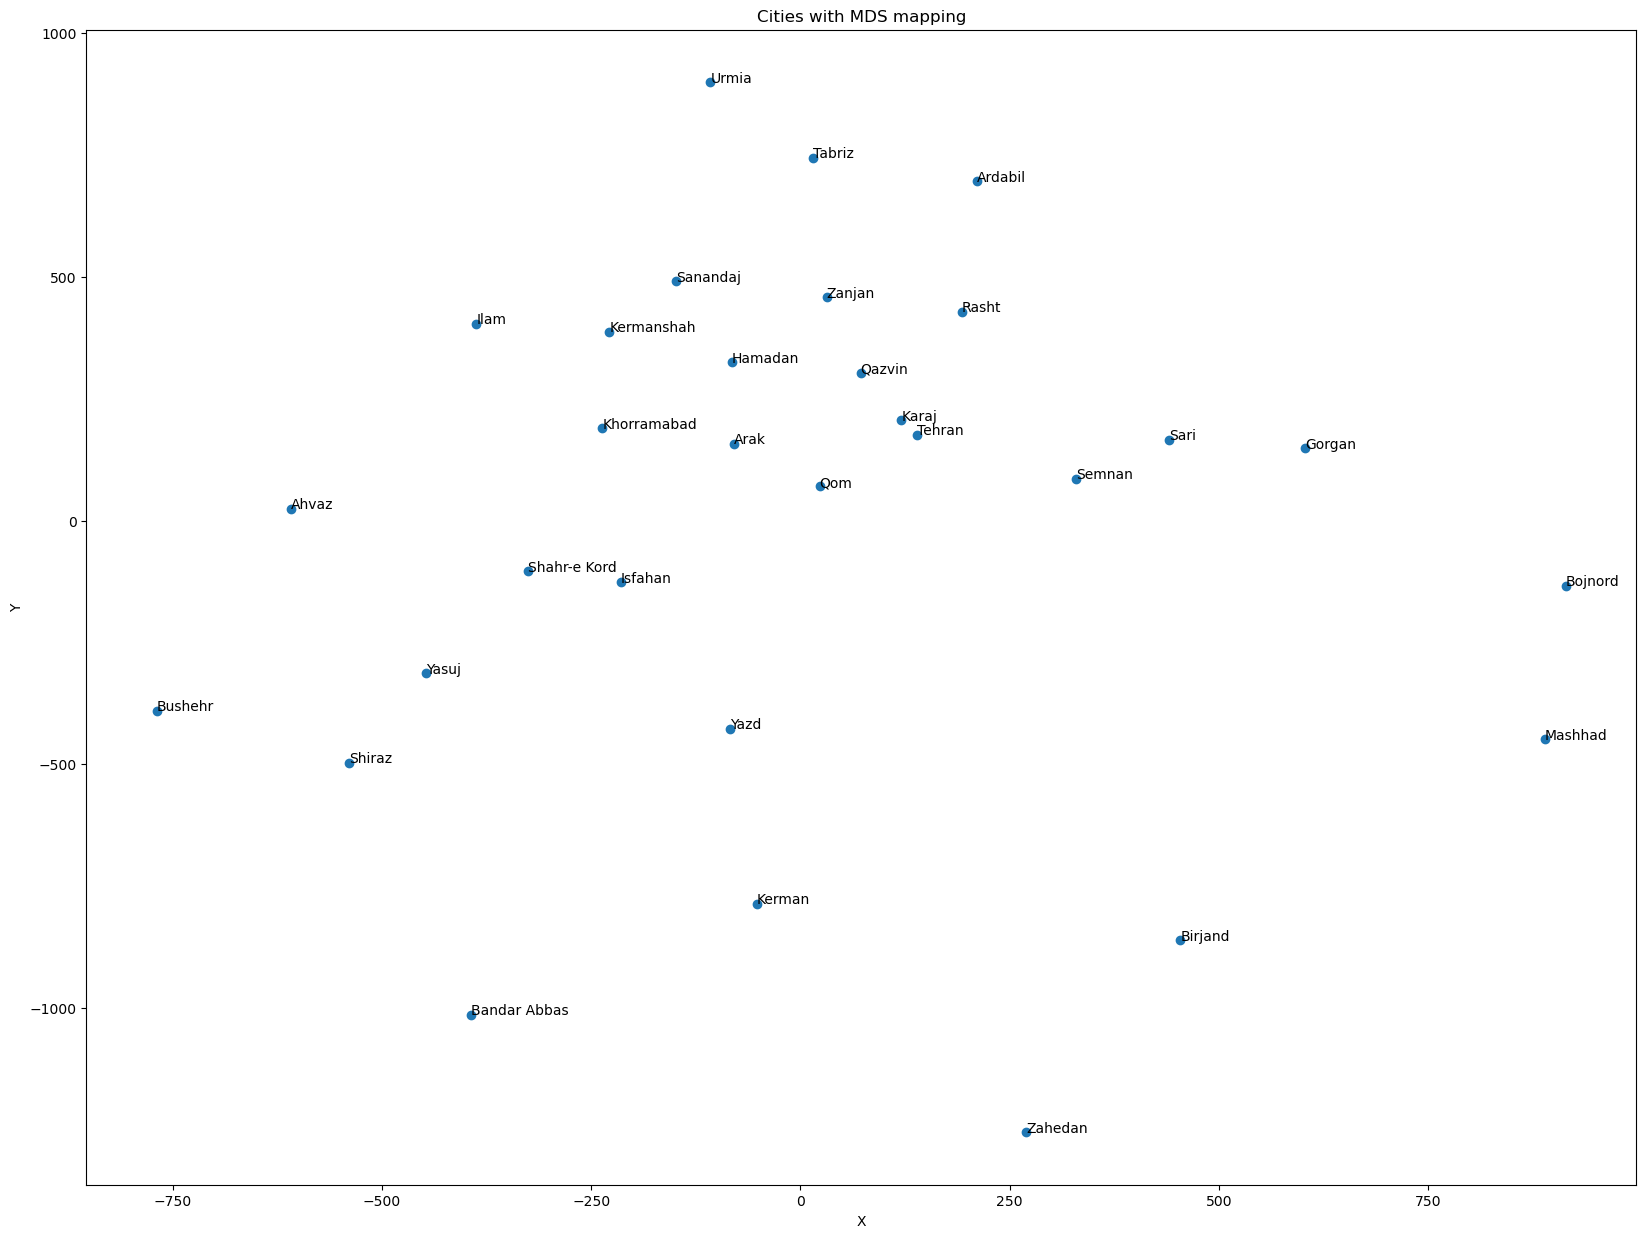

In [11]:
show(Y, distance.columns)

# Isomap

In [12]:
def Neighbors_graph(distance_matrix, number_of_neighbors, method=0):

   if method == 0:

        neighbors_graph = np.empty((distance_matrix.shape[0], distance_matrix.shape[1]))

        for i in range(distance_matrix.shape[0]):

            temp = kneighbors_graph(distance_matrix[i].reshape(-1, 1), number_of_neighbors, include_self=False, mode="distance")
            neighbors_graph[i] = temp.toarray()[i]

        return neighbors_graph
    
   else:

        neighbor_graph = kneighbors_graph(distance_matrix, number_of_neighbors, include_self=False, mode="distance")

        return neighbor_graph

In [13]:
def Isomap(distance_matrix, number_of_neighbors, method=0):

    df = Neighbors_graph(distance_matrix, number_of_neighbors, method=method)
    df = dijkstra(df, directed=False, return_predecessors=False)

    B = B_matrix(df)
    X = MDS(B)

    return X

# Isomap on Cities

In [14]:
X = Isomap(array_of_distance, 5, method=1)
Y = rotate(-90, X)

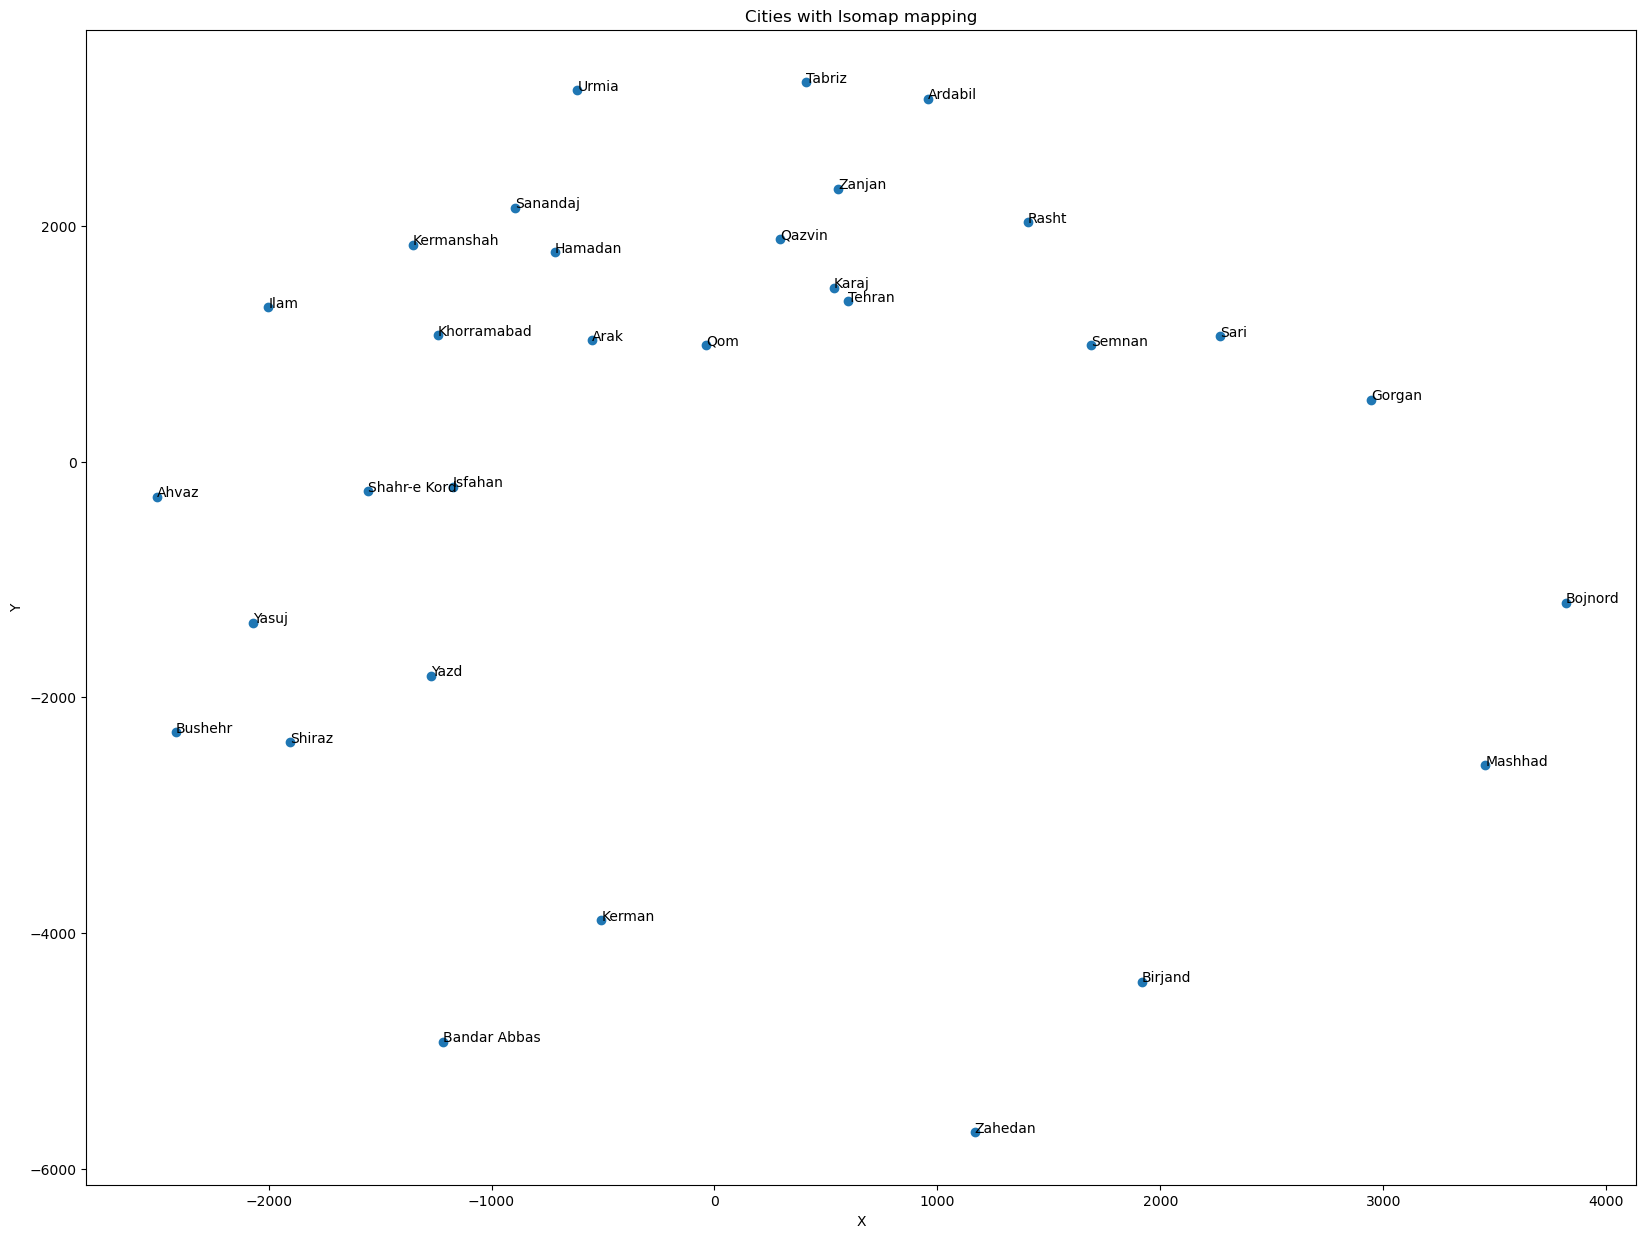

In [15]:
show(Y, distance.columns, mode="isomap")

# Isomap on Digits

In [16]:
digits = load_digits()
X, y = load_digits(return_X_y=True)

print('Shape of digit images: ', digits.images.shape)
print('Shape of X (training data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

Shape of digit images:  (1797, 8, 8)
Shape of X (training data):  (1797, 64)
Shape of y (true labels):  (1797,)


In [17]:
def plot_graph_digits(components, x, ground):

    m, n = x.shape
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = fig.add_subplot(111)
    ax.set_title("Digits")
    ax.set_xlabel('Component: 1')
    ax.set_ylabel('Component: 2')

    for i in range(100):

        img_num = np.random.randint(0, m)
        ax.text(x=components[img_num, 0], y=components[img_num, 1], s=str(ground[img_num]), fontsize=13)

    ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)

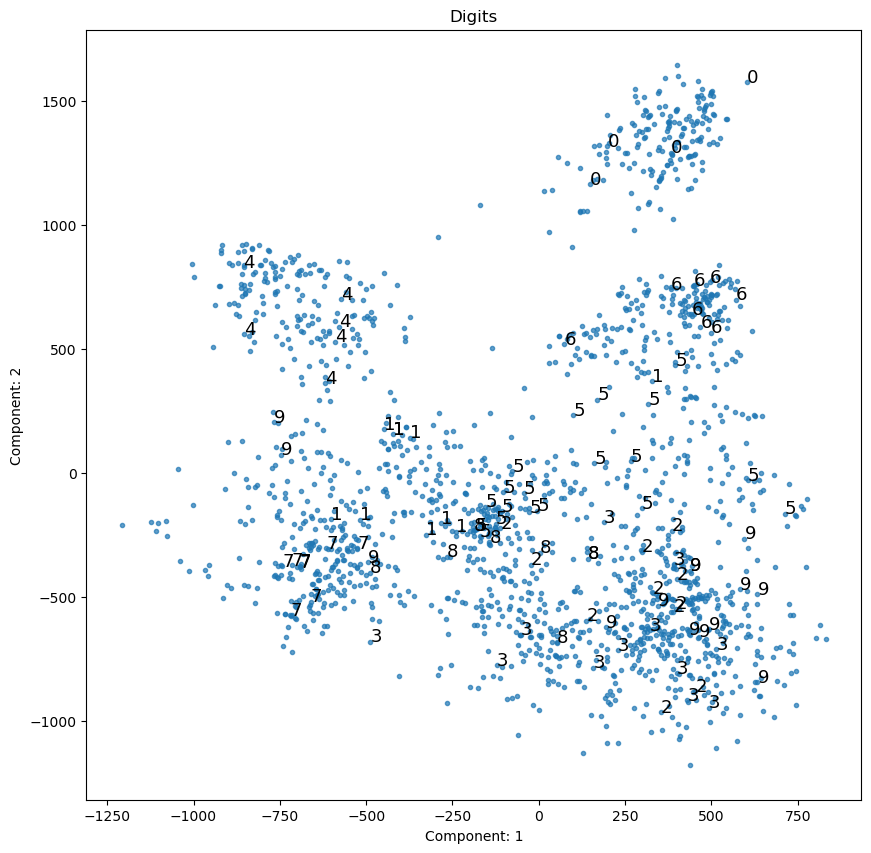

In [18]:
dis = distance_matrix(X, X, p=2)
V = Isomap(dis, 5, method=1)
O = rotate(-90, V)
plot_graph_digits(O, x=X, ground=y)

# Isomap on Faces

In [19]:
def plot_graph_faces(components, x):

    m, n = x.shape
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = fig.add_subplot(111)
    ax.set_title("Faces")
    ax.set_xlabel('Component: 1')
    ax.set_ylabel('Component: 2')

    x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
    y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08

    for i in range(40):

        img_num = np.random.randint(0, m)
        x0 = components[img_num, 0] - (x_size / 2.)
        y0 = components[img_num, 1] - (y_size / 2.)
        x1 = components[img_num, 0] + (x_size / 2.)
        y1 = components[img_num, 1] + (y_size / 2.)
        img = x[img_num, :].reshape(np.sqrt(n).astype(np.int32), np.sqrt(n).astype(np.int32)).T
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)

    ax.set_ylabel('Up-Down Pose')
    ax.set_xlabel('Right-Left Pose')

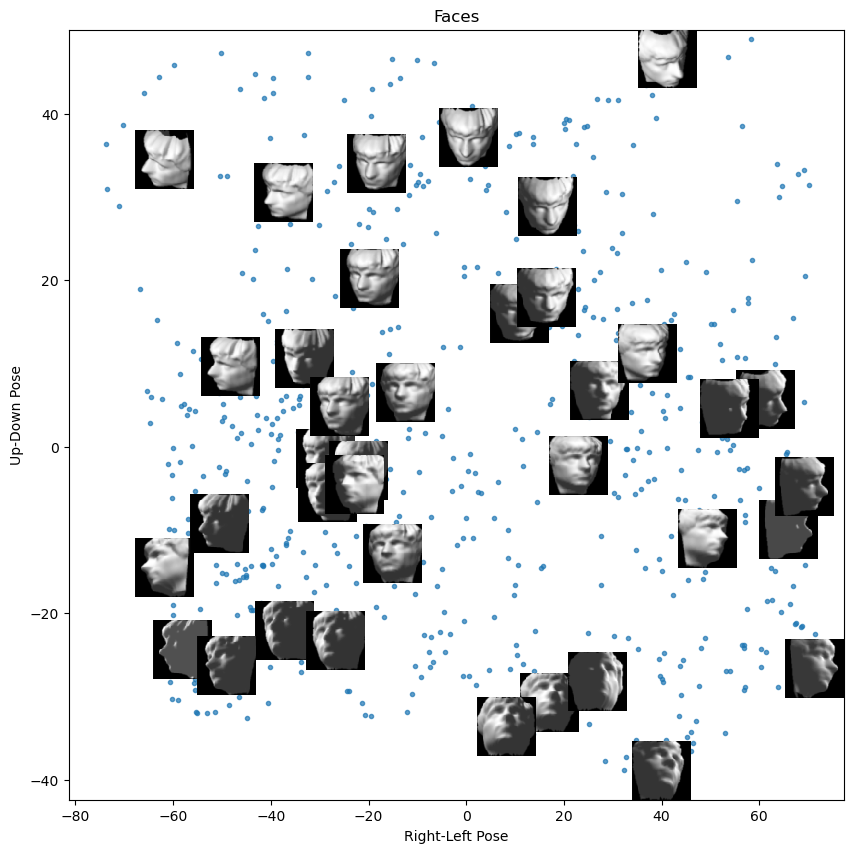

In [20]:
mat = scipy.io.loadmat('isomap.mat')
m=mat['images']
dis = distance_matrix(m.T, m.T, 2)
V = Isomap(dis, 5, method=0)
plot_graph_faces(V, x=m.T)